# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.18.1'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True
)
training_set = train_datagen.flow_from_directory(
    "dataset/training_set", target_size=(64, 64), batch_size=32, class_mode="binary"
)

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_set = test_datagen.flow_from_directory(
    "dataset/test_set", target_size=(64, 64), batch_size=32, class_mode="binary"
)

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [6]:
# unless it is not output activation should be relu
# input shape should be as in pre-processing step 64 x 64 x 3
# number of filters classically 32 but we may test other vals

cnn.add(
    tf.keras.layers.Conv2D(
        filters=32, kernel_size=3, activation="relu", input_shape=[64, 64, 3]
    )
)

/opt/anaconda3/envs/tf_keras_py311/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 2 - Pooling

In [7]:
# stride recommended 2x2
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [8]:
# input shape only in first convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))

### Adding a second pooling

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [10]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))

### Step 5 - Output Layer

In [12]:
cnn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

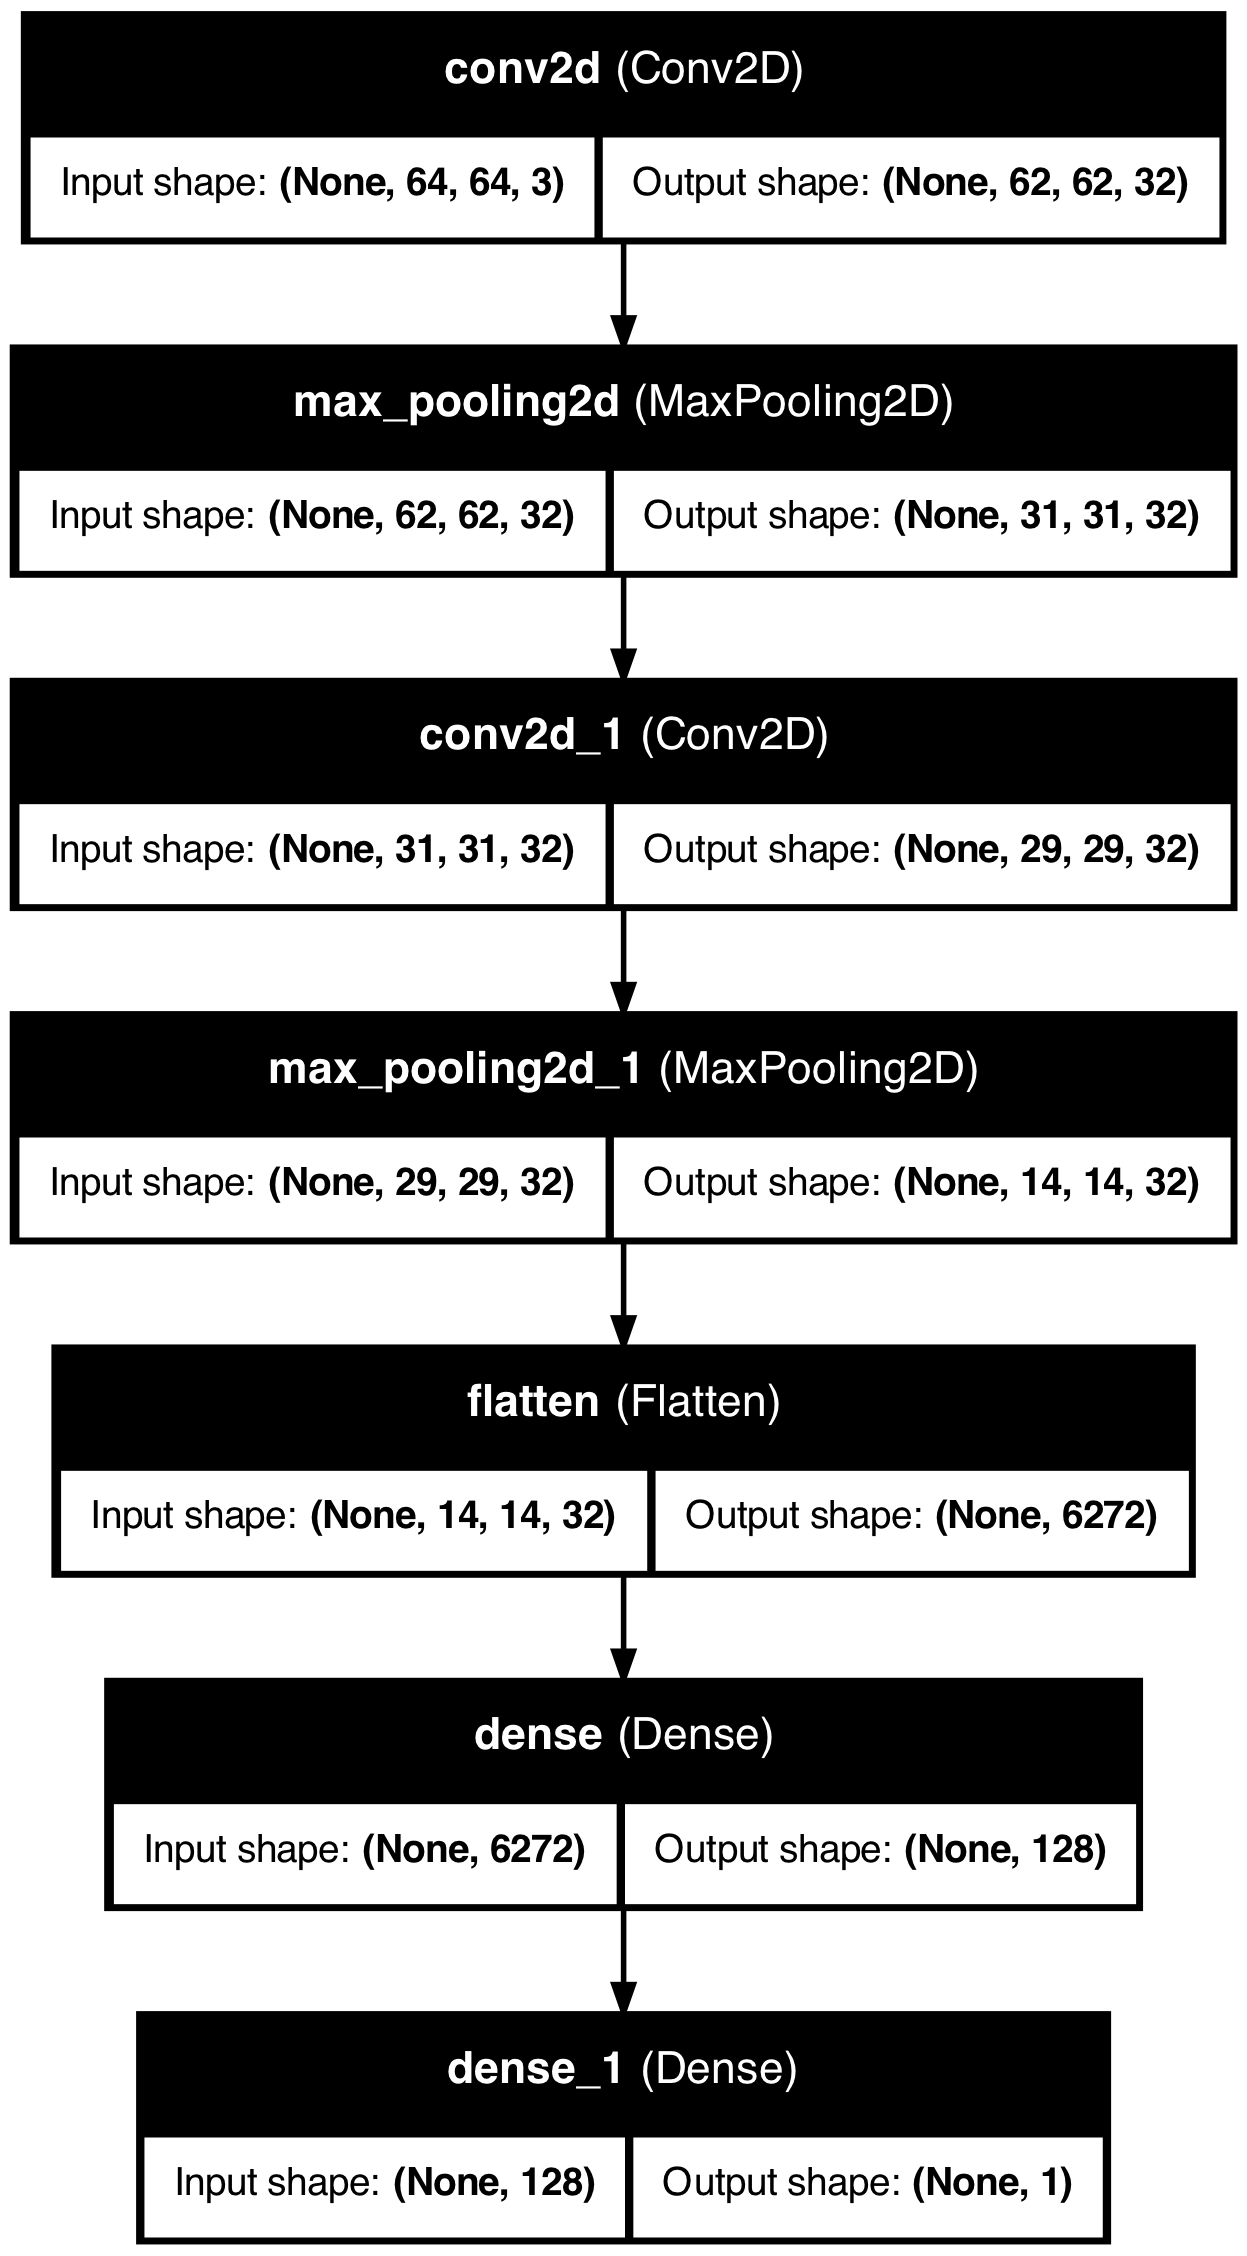

In [13]:
from keras.utils import plot_model

plot_model(cnn, to_file="cat_or_dog_cnn.png", show_shapes=True, show_layer_names=True)

## Part 3 - Training the CNN

### Compiling the CNN

In [14]:
cnn.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

### Training the CNN on the Training set and evaluating it on the Test set

In [15]:
cnn.fit(x=training_set, validation_data=test_set, epochs=25)

/opt/anaconda3/envs/tf_keras_py311/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5502 - loss: 0.6844

/opt/anaconda3/envs/tf_keras_py311/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.5504 - loss: 0.6843 - val_accuracy: 0.6460 - val_loss: 0.6365
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.6710 - loss: 0.6068 - val_accuracy: 0.7285 - val_loss: 0.5472
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.7155 - loss: 0.5566 - val_accuracy: 0.7495 - val_loss: 0.5131
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.7462 - loss: 0.5111 - val_accuracy: 0.7640 - val_loss: 0.5003
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.7619 - loss: 0.4877 - val_accuracy: 0.7640 - val_loss: 0.4931
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.7694 - loss: 0.4816 - val_accuracy: 0.7840 - val_loss: 0.4712
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.7776 - loss: 0.4733 - val_accuracy: 0.7520 - val_loss: 0.5302
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.7900 - loss: 0.4544 - val_accurac

## Part 4 - Making a single prediction

In [16]:
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img('dataset/test_set/cats/cat.4018.jpg', target_size = (64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [17]:
print(prediction)

cat


In [18]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,439,653 (9.31 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,626,436 (6.20 MB)

In [19]:
print(f"Values before expand_dims: Min={test_image.min()}, Max={test_image.max()}")

Values before expand_dims: Min=1.0, Max=255.0
